## Figures

In [3]:
import sys
from random import random

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from tqdm import tqdm
from itertools import combinations
from tqdm import tqdm

sys.path.append("../src/")

import xgi
from reducibility_hg import *

from statannotations.Annotator import Annotator

sb.set_theme(style="ticks", context="paper")

In [4]:
results_dir = "../results/"
out_dir = f"{results_dir}synthetic/"

In [27]:
# def sigma(d):
#    """
#    Return d*(d+1)/2, the sum of the first d integers"""
#    return d * (d + 1) / 2
from math import comb

#def gamma(N, d):
#    
#    return sum([comb(N-1, i) for i in range(1, d+1)])

#def gamma(N, orders):
#    
#    return sum([comb(N-1, i) for i in orders])

def gamma(H, orders):
    
    return sum([H.nodes.degree(order=i).mean() for i in orders])

## generate complete hypergraph

In [7]:
N = 5
rescale = True
d_max = 4

H0 = xgi.complete_hypergraph(N=N, max_order=d_max)
H_complete = xgi.complete_hypergraph(N=N, max_order=d_max)


orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

rescale_per_order = False

In [9]:
tau_c = find_charact_tau(
    H0,
    orders,
    weights,
    rescale_per_node=rescale,
    rescale_per_order=rescale_per_order,
    idx=-1,
)

# inverse_rescaling_factors = [max(orders) / d for d in orders]
#inverse_rescaling_factors = [gamma(N, max(orders)) / gamma(N, d) for d in orders]
inverse_rescaling_factors = [
    gamma(H0, orders) / gamma(H0, orders[:i+1]) for i in range(len(orders))
]


Ds_H, lZs_H = optimization(
    H0,
    tau_c,
    rescaling_factors=inverse_rescaling_factors,
    rescale_per_node=rescale,
    rescale_per_order=rescale_per_order,
)

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 151.17it/s]


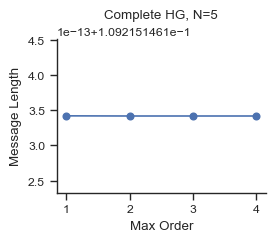

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(2.7, 2))

message_length = Ds_H + lZs_H
ax.plot(orders, message_length, "o-")

ax.set_ylabel("Message Length")
ax.set_xlabel("Max Order")
ax.set_title("functional complex.")
ax.set_title(f"Complete HG, N={N}")

# ax.set_ylim([0.02, 0.04])
# ax.set_yticks([0.02, 0.03, 0.04])


sb.despine()

fig_name = f"message_length_a2a_node_rescaled_tauc_N_{N}"

#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

In [50]:
xgi.laplacian(H0, order=1, rescale_per_node=False)

array([[ 4, -1, -1, -1, -1],
       [-1,  4, -1, -1, -1],
       [-1, -1,  4, -1, -1],
       [-1, -1, -1,  4, -1],
       [-1, -1, -1, -1,  4]])

In [43]:
xgi.laplacian(H0, order=2, rescale_per_node=True)

array([[ 6. , -1.5, -1.5, -1.5, -1.5],
       [-1.5,  6. , -1.5, -1.5, -1.5],
       [-1.5, -1.5,  6. , -1.5, -1.5],
       [-1.5, -1.5, -1.5,  6. , -1.5],
       [-1.5, -1.5, -1.5, -1.5,  6. ]])

In [7]:
np.diff(message_length)

array([ 0.00000000e+00, -3.33066907e-16,  3.33066907e-16])

In [8]:
np.save(f"{results_dir}message_lengths_2a2.npy", message_length)

In [460]:
xgi.load_xgi_data()

Available datasets are the following:
coauth-mag-geology
coauth-mag-history
congress-bills
contact-high-school
contact-primary-school
diseasome
disgenenet
email-enron
email-eu
hospital-lyon
ndc-substances
tags-ask-ubuntu
tags-math-sx
tags-stack-exchange


## generate full triangular lattice

In [28]:
def triangular_lattice_flag(n_rows, p2, periodic=False):
    """
    Generates a flag complex from a triangular lattice graph.

    Parameters
    ----------
    n_rows : int
        Number of rows in the lattice.
    p2 : float
        Probability of adding a 2-simplex to the clique complex.
    periodic : bool, optional
        Whether the lattice should have periodic boundary conditions. Default is False.

    Returns
    -------
    S_lattice : xgi Simplicial Complex

    pos : dict
        Node positions keyed by node ID.
    """

    # number of rows
    m = n_rows - 1
    # number of columns
    columns = n_rows + 1
    n = 2 * columns - 1

    if not periodic:
        n = n - 1
        m = m - 1

    # generate lattice
    G_lattice = nx.triangular_lattice_graph(
        m, n, periodic=periodic, with_positions=True
    )
    G_lattice = nx.convert_node_labels_to_integers(G_lattice)
    pos = nx.get_node_attributes(G_lattice, "pos")

    # generate random clique complex (fill in triangles)
    S_lattice = xgi.flag_complex_d2(G_lattice, p2=p2)
    return S_lattice, pos

In [29]:
n_rows = 6
rescale = True
d_max = 2
p_2 = 1

H0, _ = triangular_lattice_flag(n_rows, p2=p_2, periodic=True)
H_lattice, pos_lattice = triangular_lattice_flag(n_rows, p2=p_2, periodic=False)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

N = H0.num_nodes

In [30]:
tau_c = find_charact_tau(
    H0,
    orders,
    weights,
    rescale_per_node=rescale,
    rescale_per_order=rescale_per_order,
    idx=-1,
)


#inverse_rescaling_factors = [d_max / d for d in orders]
inverse_rescaling_factors = [
    gamma(H0, orders) / gamma(H0, orders[:i+1]) for i in range(len(orders))
]

Ds_H, lZs_H = optimization(
    H0,
    tau_c,
    rescaling_factors=inverse_rescaling_factors,
    rescale_per_node=rescale,
    rescale_per_order=rescale_per_order,
)

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 242.22it/s]


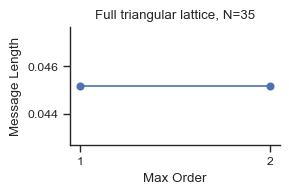

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(2.7, 2))

message_length = Ds_H + lZs_H
ax.plot(orders, message_length, "o-")

ax.set_ylabel("Message Length")
ax.set_xlabel("Max Order")
ax.set_title("functional complex.")

ax.set_title(f"Full triangular lattice, N={N}")

ax.set_xticks([1, 2])
plt.subplots_adjust(top=0.7, wspace=0.3)

sb.despine()

fig_name = f"message_length_full_triangular_lattice_rescaled_tauc_N_{N}"

# plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

In [13]:
np.diff(message_length)

array([0.])

In [14]:
np.save(f"{results_dir}message_lengths_latticetri.npy", message_length)

## together

In [15]:
message_lengths_a2a = np.load(f"{results_dir}message_lengths_2a2.npy")
message_lengths_tri = np.load(f"{results_dir}message_lengths_latticetri.npy")

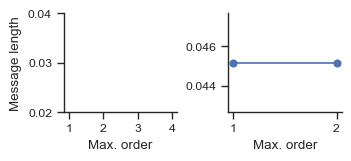

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(3.4, 1.5), layout="constrained")

orders1 = list(range(1, 5))
ax1.plot(orders1, message_lengths_a2a, "o-")

ax1.set_ylim([0.02, 0.04])
ax1.set_yticks([0.02, 0.03, 0.04])
ax1.set_xticks(orders1)

orders2 = list(range(1, 3))
ax2.plot(orders2, message_lengths_tri, "o-")
ax2.set_xticks(orders2)

ax1.set_ylabel("Message length")
ax1.set_xlabel("Max. order")
ax2.set_xlabel("Max. order")


sb.despine()

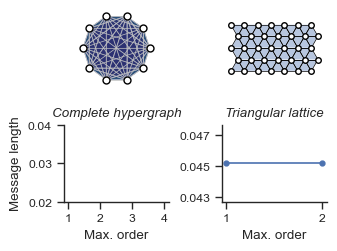

In [17]:
fig, axs = plt.subplots(
    2, 2, figsize=(3.4, 2.5), height_ratios=[1, 1]
)  # ,layout="constrained")

orders1 = list(range(1, 5))
axs[1, 0].plot(orders1, message_lengths_a2a, "o-", ms=3.5)

axs[1, 0].set_ylim([0.02, 0.04])
axs[1, 0].set_yticks([0.02, 0.03, 0.04])
axs[1, 0].set_xticks(orders1)

orders2 = list(range(1, 3))
axs[1, 1].plot(orders2, message_lengths_tri, "o-", ms=3.5)
axs[1, 1].set_xticks(orders2)
axs[1, 1].set_yticks([0.043, 0.045, 0.047])


axs[1, 0].set_ylabel("Message length")
axs[1, 1].set_xlabel("Max. order")
axs[1, 0].set_xlabel("Max. order")

axs[1, 0].set_title("Complete hypergraph", style="italic")
axs[1, 1].set_title("Triangular lattice", style="italic")

pos_complete = xgi.circular_layout(H_complete)
xgi.draw(
    H_complete,
    pos=pos_complete,
    alpha=0.1,
    ax=axs[0, 0],
    node_size=5,
    dyad_color="silver",
    dyad_lw=0.5,
)

_, _ = xgi.draw(
    H_lattice,
    pos=pos_lattice,
    alpha=0.1,
    ax=axs[0, 1],
    node_size=4,
    dyad_color="black",
    dyad_lw=0.5,
    edge_fc="b",
)

sb.despine()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

fig_name = f"figure_1"

plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight", pad_inches=0)
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight", pad_inches=0)

## noeud pap

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x28facc1c0>, None, None))

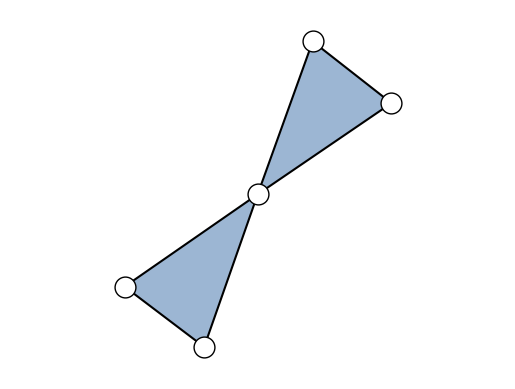

In [150]:
edges = [(1, 2, 3), (3, 4, 5)]

S = xgi.SimplicialComplex(edges)

xgi.draw(S)

In [155]:
orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

N = S.num_nodes

tau_c = find_charact_tau(S, orders, weights, rescale_per_node=rescale, idx=-1)

inverse_rescaling_factors = [max(orders) / d for d in orders]
Ds_H, lZs_H = optimization(
    S, tau_c, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale
)

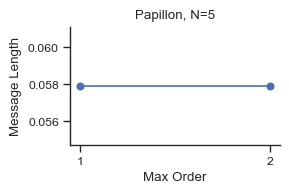

In [156]:
fig, ax = plt.subplots(1, 1, figsize=(2.7, 2))

message_length = Ds_H + lZs_H
ax.plot(orders, message_length, "o-")

ax.set_ylabel("Message Length")
ax.set_xlabel("Max Order")
ax.set_title("functional complex.")

ax.set_title(f"Papillon, N={N}")

ax.set_xticks([1, 2])
plt.subplots_adjust(top=0.7, wspace=0.3)

sb.despine()

fig_name = f"message_length_full_noeudpap_tauc_N_{N}"

# plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

## complete with holes

In [51]:
from math import comb

def gamma(N, orders):
    
    return sum([comb(N-1, i) for i in orders])

In [11]:
N = 20
rescale = True
d_max = 4

H0 = xgi.complete_hypergraph(N=N, max_order=d_max)
H_complete = xgi.complete_hypergraph(N=N, max_order=d_max)


orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

print(H0)

p_rm = 1

edges_rm = []
orders_rm = [3]
for order in orders_rm:
    edges_rm += [i for i in H0.edges.filterby("order", order) if random() < p_rm]
# print(edges_rm)
print(len(edges_rm))

H0.remove_edges_from(edges_rm)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

print(H0)

Unnamed Hypergraph with 20 nodes and 21679 hyperedges
4845
Unnamed Hypergraph with 20 nodes and 16834 hyperedges


In [53]:
rescale_per_order = False

In [12]:
#inverse_rescaling_factors = [
#    gamma(N, orders) / gamma(N, orders[: i + 1]) for i in range(len(orders))
#]

inverse_rescaling_factors = [
    gamma(H0, orders) / gamma(H0, orders[:i+1]) for i in range(len(orders))
]

In [13]:
inverse_rescaling_factors

[214.0, 21.4, 1.0]

In [15]:
tau_c = find_charact_tau(
    H0,
    orders,
    weights,
    rescale_per_node=rescale,
    rescale_per_order=rescale_per_order,
    idx=-1,
)

# inverse_rescaling_factors = [max(orders) / d for d in orders]

# inverse_rescaling_factors = [len(orders) / i for i in range(1, len(orders)+1)]
suffix = "rescaling_present_orders"

inverse_rescaling_factors = [
    gamma(H0, orders) / gamma(H0, orders[:i+1]) for i in range(len(orders))
]

# inverse_rescaling_factors = list(range(1, len(orders)+1))[::-1]

# inverse_rescaling_factors = [1 for d in orders]
# suffix = "no_rescaling"

tau_per_order = False

# tau_c = 1
# suffix = "tau_per_order"

if tau_per_order and suffix != "tau_per_order":
    raise ValueError("check input params")


Ds_H, lZs_H = optimization(
    H0,
    tau_c,
    rescaling_factors=inverse_rescaling_factors,
    rescale_per_node=rescale,
    rescale_per_order=rescale_per_order,
    tau_per_order=tau_per_order,
)

100%|█████████████████████████████████████████████| 3/3 [00:00<00:00, 16.67it/s]


/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_75778/451306837.py:10: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs[0, 0].get_shared_y_axes().join(axs[0, 0], axs[0, 1])
/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_75778/451306837.py:11: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs[0, 0].get_shared_y_axes().join(axs[0, 0], axs[0, 2])


3.17e-01
rescaling_present_orders


'message_length_a2a_N_20_p_rm_1_orders_rm_[3]_tau_N_full'

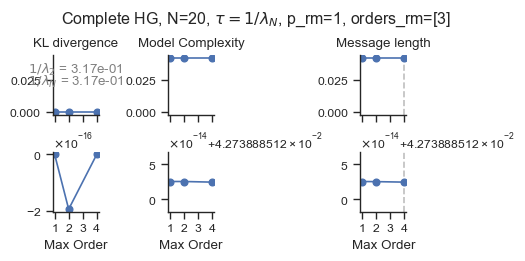

In [16]:
fig, axs = plt.subplots(
    2, 3, figsize=(5, 2.5), sharey=False, sharex=True, layout="constrained"
)

message_length = Ds_H + lZs_H
axs[0, 0].plot(orders, Ds_H, "o-")
axs[0, 1].plot(orders, lZs_H, "o-")
axs[0, 2].plot(orders, message_length, "o-")

axs[0, 0].get_shared_y_axes().join(axs[0, 0], axs[0, 1])
axs[0, 0].get_shared_y_axes().join(axs[0, 0], axs[0, 2])


axs[1, 0].plot(orders, Ds_H, "o-")
axs[1, 1].plot(orders, lZs_H, "o-")
axs[1, 2].plot(orders, message_length, "o-")

# ax.set_ylabel("Message Length")
axs[1, 0].set_xlabel("Max Order")
axs[1, 1].set_xlabel("Max Order")
axs[1, 2].set_xlabel("Max Order")

axs[1, 0].set_xticks(range(1, 5))
# ax.set_title("functional complex.")
fig.suptitle(
    rf"Complete HG, N={N}, $\tau = 1 / \lambda_N$,"
    + f" p_rm={p_rm}, orders_rm={orders_rm}"
)

# ax.set_ylim([0.02, 0.04])
# ax.set_yticks([0.02, 0.03, 0.04])

order_min = np.argmin(message_length)
axs[1, 2].axvline(orders[order_min], ls="--", zorder=-2, alpha=0.5, c="grey")
axs[0, 2].axvline(orders[order_min], ls="--", zorder=-2, alpha=0.5, c="grey")

tau_2 = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1)
tau_N = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=-1)

axs[0, 0].text(
    0.5,
    0.9,
    rf"$1 / \lambda_2$ = {tau_2:.2e}",
    va="top",
    ha="center",
    transform=axs[0, 0].transAxes,
    c="grey",
)
axs[0, 0].text(
    0.5,
    0.7,
    rf"$1 / \lambda_N$ = {tau_N:.2e}",
    va="top",
    ha="center",
    transform=axs[0, 0].transAxes,
    c="grey",
)

axs[1, 0].ticklabel_format(
    axis="y", style="scientific", scilimits=(0, 0), useMathText=True, useOffset=True
)
axs[1, 1].ticklabel_format(
    axis="y", style="scientific", scilimits=(0, 0), useMathText=True, useOffset=True
)
axs[1, 2].ticklabel_format(
    axis="y", style="scientific", scilimits=(0, 0), useMathText=True, useOffset=True
)

axs[0, 0].set_title("KL divergence")
axs[0, 1].set_title("Model Complexity")
axs[0, 2].set_title("Message length")


print(f"{tau_N:.2e}")
print(suffix)

sb.despine()

fig_name = f"message_length_a2a_N_{N}_p_rm_{p_rm}_orders_rm_{orders_rm}_tau_N_full"
fig_name
# plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

3.17e-01


'message_length_a2a_N_20_p_rm_1_orders_rm_[3]_tau_N'

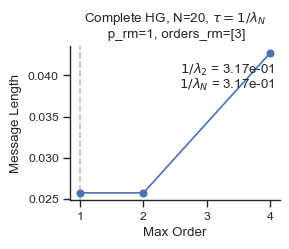

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(2.7, 2))

message_length = Ds_H + lZs_H
ax.plot(orders, message_length, "o-")

ax.set_ylabel("Message Length")
ax.set_xlabel("Max Order")
ax.set_title("functional complex.")
ax.set_title(
    rf"Complete HG, N={N}, $\tau = 1 / \lambda_N$"
    + f"\n p_rm={p_rm}, orders_rm={orders_rm}"
)

# ax.set_ylim([0.02, 0.04])
# ax.set_yticks([0.02, 0.03, 0.04])

order_min = np.argmin(message_length)
ax.axvline(orders[order_min], ls="--", zorder=-2, alpha=0.5, c="grey")

tau_2 = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1)
tau_N = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=-1)

ax.text(
    0.75,
    0.9,
    rf"$1 / \lambda_2$ = {tau_2:.2e}",
    va="top",
    ha="center",
    transform=ax.transAxes,
)
ax.text(
    0.75,
    0.8,
    rf"$1 / \lambda_N$ = {tau_N:.2e}",
    va="top",
    ha="center",
    transform=ax.transAxes,
)

print(f"{tau_N:.2e}")

sb.despine()

fig_name = f"message_length_a2a_N_{N}_p_rm_{p_rm}_orders_rm_{orders_rm}_tau_N"
fig_name
# plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

In [455]:
tau_2 = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1)
tau_N = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=-1)

print(f"{tau_2:.2e}")
print(f"{tau_N:.2e}")

2.41e-01
2.33e-01


In [437]:
from numpy.linalg import eigvals, eigvalsh

In [285]:
L_multi = xgi.multiorder_laplacian(
    H0, orders, weights, rescale_per_node=True, sparse=False
)

lambdas = eigvalsh(L_multi)

spectrum = 1 / lambdas

In [286]:
# spectrum = [1 / find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=i) for i in range(N)]

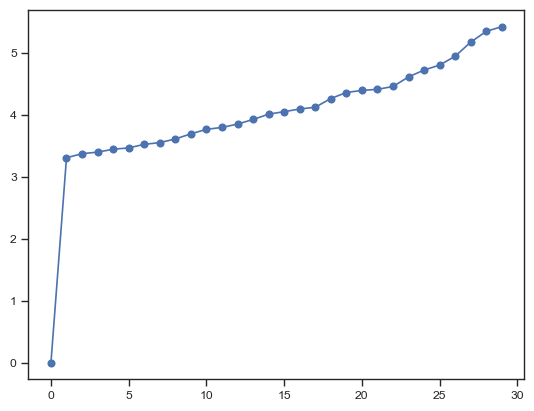

In [287]:
plt.plot(lambdas, "o-")

## Single triangle with edges

In [10]:
edges = [(1, 2, 3), (1, 2), (2, 3), (1, 3)]
H0 = xgi.Hypergraph(edges)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))
N = H0.num_nodes
print(H0)

rescale = True

Unnamed Hypergraph with 3 nodes and 4 hyperedges


In [45]:
tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=-1)

inverse_rescaling_factors = [max(orders) / d for d in orders]
Ds_H, lZs_H = optimization(
    H0, tau_c, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale
)

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 101.48it/s]


In [46]:
xgi.laplacian(H0, order=1, rescale_per_node=True)

array([[ 4., -1., -1., -1., -1.],
       [-1.,  4., -1., -1., -1.],
       [-1., -1.,  4., -1., -1.],
       [-1., -1., -1.,  4., -1.],
       [-1., -1., -1., -1.,  4.]])

In [47]:
xgi.laplacian(H0, order=2, rescale_per_node=True)

array([[ 6. , -1.5, -1.5, -1.5, -1.5],
       [-1.5,  6. , -1.5, -1.5, -1.5],
       [-1.5, -1.5,  6. , -1.5, -1.5],
       [-1.5, -1.5, -1.5,  6. , -1.5],
       [-1.5, -1.5, -1.5, -1.5,  6. ]])

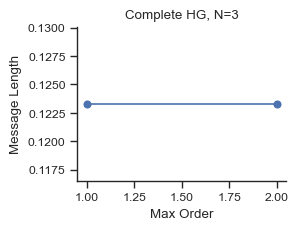

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(2.7, 2))

message_length = Ds_H + lZs_H
ax.plot(orders, message_length, "o-")

ax.set_ylabel("Message Length")
ax.set_xlabel("Max Order")
ax.set_title("functional complex.")
ax.set_title(f"Complete HG, N={N}")

# ax.set_ylim([0.02, 0.04])
# ax.set_yticks([0.02, 0.03, 0.04])


sb.despine()

fig_name = f"message_length_a2a_node_rescaled_tauc_N_{N}"

#plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

## triangular lattice with regular holes

In [131]:
# number of rows
n_rows = 6
p_2 = 1

S_lattice, pos_lat = triangular_lattice_flag(n_rows, p2=p_2, periodic=False)

# create a non-periodic version to plot (clearer visually)
S_lattice_plot, pos = triangular_lattice_flag(n_rows, p2=0)  # pas de triangles
# add valid triangles (non-periodic ones)
triangles = S_lattice.edges.filterby("order", 2).members(dtype=dict)
links = S_lattice_plot.edges.filterby("order", 1).members()
triangles_valid = {
    id: e
    for id, e in triangles.items()
    if (e in xgi.find_triangles(nx.Graph(links)))
    and id in sorted(triangles.keys())[::2]
}
S_lattice_plot.add_simplices_from(triangles_valid)

print(S_lattice)
print(S_lattice_plot)

Unnamed SimplicialComplex with 35 nodes and 130 simplices
Unnamed SimplicialComplex with 35 nodes and 106 simplices


(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x28f7433d0>, None, None))

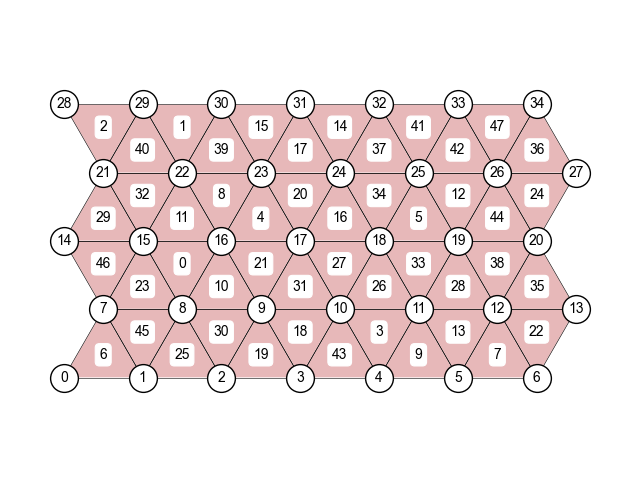

In [148]:
fig, ax = plt.subplots(figsize=(4 * 2, 3 * 2))

xgi.draw(
    S_lattice,
    pos=pos,
    ax=ax,
    edge_fc="r",
    node_size=20,
    dyad_lw=0.4,
    hyperedge_labels=True,
    node_labels=True,
)

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x2b9cd8970>, None, None))

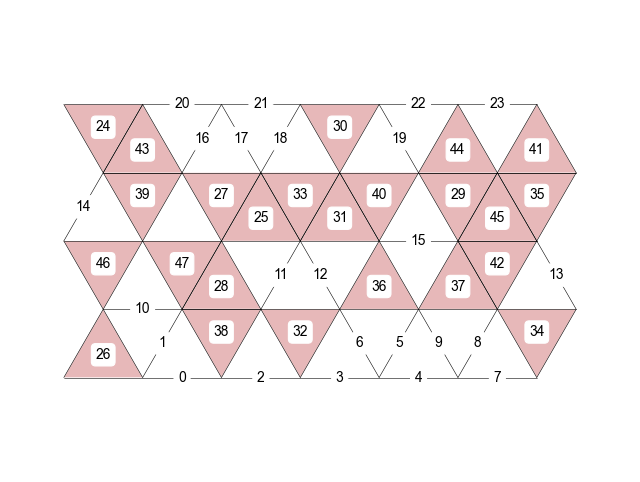

In [133]:
fig, ax = plt.subplots(figsize=(4 * 2, 3 * 2))

xgi.draw(
    S_lattice_plot,
    pos=pos,
    ax=ax,
    edge_fc="r",
    node_size=0,
    dyad_lw=0.4,
    hyperedge_labels=True,
)